In [38]:
library(ggplot2)
library(Hmisc)
source("../utilis/utilis.R")
library(glue)

In [39]:
threshold = 1
cutoff_column = 'padj'
data_df_path =  '../../../output/PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/one_wayANOVA_PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_fullreport.csv'
meta_df_path =  '../../../input/sequence_file/clean_deduplicated_meta_df.csv'
annot_df_path = '../../../input/HILICpos_mzML/output_asari_project_224113827_targeted_search/simp-m-targeted_extraction-Feature_table.tsv' 

# Prepare the data

## Read and transform the data table and metadata table

In [40]:
df = read.csv(data_df_path, row.names = 1, sep = ',')
meta_df = read.csv(meta_df_path, row.names = 1)
annot_df = read.csv(annot_df_path, sep = '\t')

In [41]:
id_annot = annot_df[['id_number']]
names(id_annot) = annot_df[['Species.Shorthand']]

----

In [42]:
head(df)

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,⋯,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3,nist,q3June2014_1,q3June2014_2
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F10769,372.7447,25.17,23.59,28.32,9930,2649961,1,0.99,456,5,⋯,18.18448,19.42996,20.42619,19.78156,18.18448,18.18448,18.18448,NA,NA,NA
F11541,384.7631,38.83,36.20,41.72,10150,748661750,1,0.97,86549,22,⋯,24.77617,24.17855,24.45577,24.02758,25.23576,25.45258,25.19671,25.99780,25.03423,25.0114
F13199,548.3007,24.64,22.28,27.79,12591,124579197,1,0.87,7880,13,⋯,23.64044,24.37743,23.83728,24.03485,22.91200,24.82122,24.43848,16.85336,NA,NA
F13675,557.3588,25.43,23.59,28.32,12697,4217228,1,0.97,587,6,⋯,18.72961,20.27951,20.12174,20.34119,18.72961,19.72961,20.42344,NA,NA,NA
F13861,486.2846,25.95,24.38,28.84,11788,3788049,1,0.84,363,5,⋯,18.21851,19.84244,20.70139,21.10255,18.21851,19.77288,18.21851,NA,NA,NA
F14458,571.3745,25.69,23.59,28.84,12860,57656484,1,0.89,6250,12,⋯,22.78670,22.89830,23.05746,22.66804,22.39844,23.13912,23.15323,NA,NA,NA


In [43]:
grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
[37]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE

In [44]:
data_df = df[grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))]

In [45]:
head(data_df)

,Naive_1,Naive_2,Naive_3,R5neg_1,R5neg_2,R5neg_3,R5pos_1,R5pos_2,R5pos_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
F10769,19.18448,19.25283,18.18448,19.42996,20.42619,19.78156,18.18448,18.18448,18.18448
F11541,25.47994,24.98491,24.77617,24.17855,24.45577,24.02758,25.23576,25.45258,25.19671
F13199,24.08338,24.45670,23.64044,24.37743,23.83728,24.03485,22.91200,24.82122,24.43848
F13675,18.72961,18.72961,18.72961,20.27951,20.12174,20.34119,18.72961,19.72961,20.42344
F13861,18.21851,19.21851,18.21851,19.84244,20.70139,21.10255,18.21851,19.77288,18.21851
F14458,22.18899,22.59417,22.78670,22.89830,23.05746,22.66804,22.39844,23.13912,23.15323


----

In [46]:
head(meta_df)

,class,biological_samples,cell_number
,<chr>,<chr>,<int>
Naive_1,Naive,Yes,300
Naive_2,Naive,Yes,300
Naive_3,Naive,Yes,300
R5neg_1,R5neg,Yes,655
R5neg_2,R5neg,Yes,687
R5neg_3,R5neg,Yes,865


----

In [47]:
annot_df[1:10,]

,id_number,query_target,Species.Shorthand,Formula,adduct_type,id_number.1,mz,rtime,rtime_left_base,rtime_right_base,⋯,nist_5,q3June2014_1b_1,q3June2014_1b_3,q3June2014_1b_5,q3June2014_2a_1,q3June2014_2a_3,q3June2014_2a_5,q3June2014_2b_1,q3June2014_2b_3,q3June2014_2b_5
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,F8342,285.6450,LPS 22:6,569.2754,M+2H[2+],F8342,285.6449,24.12,22.01,25.43,⋯,0,1880316,1898032,2087381,2028266,1400488,1438950,1530588,1802440,1358006
2,F8901,289.6763,LPS 22:2,577.3380,M+2H[2+],F8901,289.6775,28.84,28.06,30.16,⋯,0,0,0,0,0,0,0,0,0,0
3,F10769,372.7441,PS 33:3,743.4737,M+2H[2+],F10769,372.7447,25.17,23.59,28.32,⋯,0,0,0,0,0,0,0,0,0,0
4,F11347,380.7598,PS 34:2,759.5050,M+2H[2+],F11347,380.7611,40.93,40.41,42.77,⋯,0,955231,0,0,694556,652651,772866,0,775396,383544
5,F11353,380.7780,PS O-35:2,759.5414,M+2H[2+],F11353,380.7779,88.75,86.65,91.90,⋯,24566,654880,471393,1098206,0,544060,0,0,868383,0
6,F11541,384.7623,PS O-36:5,767.5101,M+2H[2+],F11541,384.7631,38.83,36.20,41.72,⋯,69392814,33692448,33939957,35447573,34704157,33474863,33362928,34226621,32295323,34860102
7,F11651,386.7598,PS 35:3,771.5050,M+2H[2+],F11651,386.7602,24.90,23.59,28.06,⋯,0,0,0,0,0,0,0,0,0,0
8,F12286,394.7936,PS O-37:2,787.5727,M+2H[2+],F12286,394.7919,55.38,53.02,56.96,⋯,0,0,0,0,0,0,0,0,0,0
9,F12379,396.7441,PS 37:7,791.4737,M+2H[2+],F12379,396.7429,49.86,46.71,53.02,⋯,0,566139,605128,410833,565248,289234,392083,506119,398836,384224


In [48]:
lookUpAnnot <- function(annot_df,
                        FeatureID,
                        look4column = '') {
    output = annot_df[annot_df[,'id_number'] == FeatureID,look4column]
    return(output)
}

In [49]:
lookUpAnnot(annot_df,'F8342','Species.Shorthand')

[1] "LPS 22:6"

## Transform and merge data

In [50]:
source('../utilis/utilis.R')
transform_merge_data4violin <- function(df = df,
                                 meta_df = meta_df,
                                 class_column = 'class',
                                 cutoff_column = 'padj', 
                                 threshold = threshold) {
    
    df_filt <- df[df[,cutoff_column] < threshold,
              colnames(df)[grepl('Naive\\_[0-9]|R5pos\\_[0-9]|R5neg\\_[0-9]',colnames(df))]] # 
    df_filt.T <- t(df_filt)
    # print(head(df_filt.T))
    merged_df = merge_by_rowName(meta_df,df_filt.T, all.y = TRUE)
    merged_df[,class_column] = factor(
        merged_df[,class_column],
        level = c('Naive',
                  'R5pos',
                  'R5neg')
    )
    return(merged_df)
}

In [51]:
merged_df <- transform_merge_data4violin(df = df,
                                         meta_df = meta_df,
                                         class_column = 'class',
                                         cutoff_column = 'padj', 
                                         threshold = threshold)

In [52]:
colnames(merged_df)

[1] "class"              "biological_samples" "cell_number"       
 [4] "F10769"             "F11541"             "F13199"            
 [7] "F13675"             "F13861"             "F14458"            
[10] "F14782"             "F15464"             "F15644"            
[13] "F16158"             "F16361"             "F16956"            
[16] "F17082"             "F17371"             "F17374"            
[19] "F17379"             "F17417"             "F17442"            
[22] "F17460"             "F17508"             "F17581"            
[25] "F17617"             "F17621"             "F17672"            
[28] "F17785"             "F17828"             "F17855"            
[31] "F17876"             "F17923"             "F18007"            
[34] "F18169"             "F18258"             "F18314"            
[37] "F18343"             "F18388"             "F18429"            
[40] "F18462"             "F18473"             "F18656"            
[43] "F18751"             "F18816"             "F18825"            
[46] "F18849"             "F18860"             "F18863"            
[49] "F18893"             "F18900"

# Output directory

In [53]:
output_dir = "../../../output/PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/PS_sum_boxplot/"
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'../../../output/PS_speciesOnly_hMinImp_TICnorm_groupFil0.3_HILICpos_1wayANOVA/PS_sum_boxplot' already exists”


In [54]:
rowMeans = rowMeans(merged_df[,4:ncol(merged_df)])

In [55]:
PSsum_df = merged_df[,1:3]
PSsum_df$PS_mean = rowMeans

In [56]:
PSsum_df

,class,biological_samples,cell_number,PS_mean
,<fct>,<chr>,<int>,<dbl>
Naive_1,Naive,Yes,300,21.91810
Naive_2,Naive,Yes,300,22.31383
Naive_3,Naive,Yes,300,21.54372
R5neg_1,R5neg,Yes,655,22.16368
R5neg_2,R5neg,Yes,687,22.36890
R5neg_3,R5neg,Yes,865,22.36156
R5pos_1,R5pos,Yes,142,20.83564
R5pos_2,R5pos,Yes,200,21.93719
R5pos_3,R5pos,Yes,150,21.18744


# Wrapper Function: plot a single box plot

In [57]:
box_plot <- function(long_df = merged_df,
                        x = 'class',
                        y = var,
                        xlab = xlab,
                        ylab = ylab,
                        fill_color = 'class',
                        fig_width = 8,
                        fig_height = 8,
                        text_size = 20,
                        legend_size = 20,
                        axis_title_size = 20,
                        output_dir = "",
                        pdf_prefix = 'test',
                        show_plot = TRUE) {
    
    options(repr.plot.width = fig_width, repr.plot.height = fig_height)

    p <- ggplot(long_df, aes_string(x = x, y = y, fill = fill_color)) + 
        geom_boxplot(outlier.shape = NA) +
        xlab(xlab) + ylab(ylab) + 
        geom_jitter(alpha = 1) +
        scale_fill_manual(values = c("#888888","#0000ff","#ff0000")) +  #

        # set transparency
        # https://ggplot2.tidyverse.org/reference/theme.html
        theme(
          panel.grid.major = element_line(colour = "grey50",linetype = "dashed", size = 0.2),
          panel.border = element_rect(fill = NA),
          #panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",colour = NA),
          plot.background = element_rect(fill = "transparent",colour = NA),
          axis.text = element_text(size = text_size, colour="black"),
          axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=0.5, colour="black"),
          legend.text= element_text(size = legend_size),
          legend.title = element_text(size = legend_size),
          axis.title = element_text(size = axis_title_size)
        )
    if (show_plot == TRUE) {
        print(p) # display the plot
    } else {return(p)}

    if (length(output_dir)!=0) {
            ggsave(file.path(output_dir, paste0("ggplot_boxplot_",pdf_prefix,".pdf")), width = fig_width, height = fig_height)
        }
}

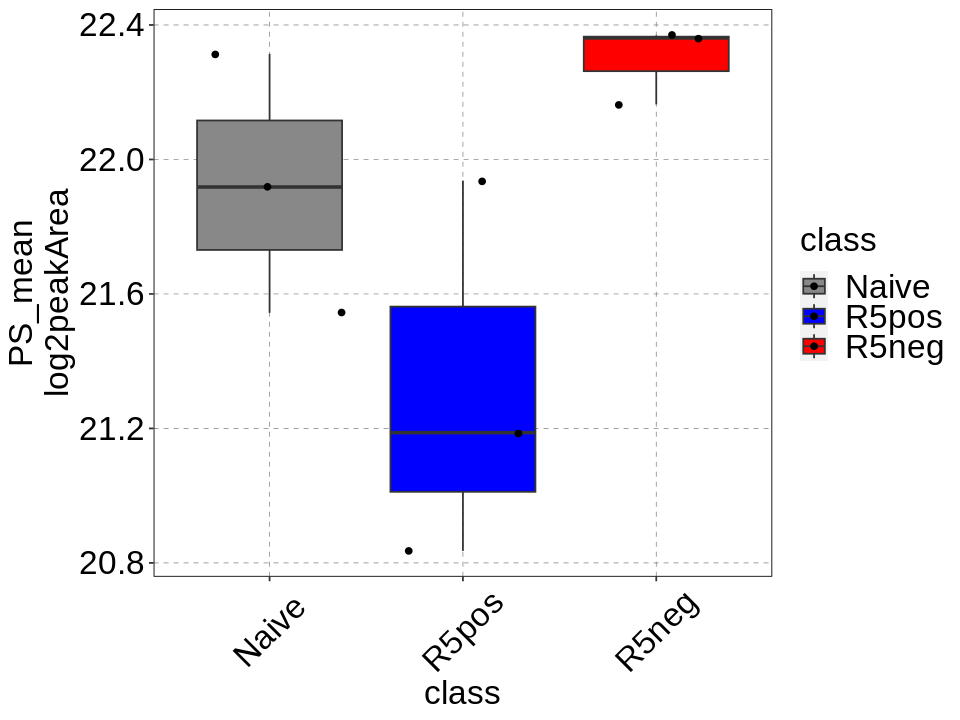

In [58]:
var = 'PS_mean'
box_plot(long_df = PSsum_df,
            x = 'class',
            y = var,
            xlab = 'class',
            ylab = glue('{var}\nlog2peakArea'),
            fill_color = 'class',
            fig_width = 8,
            fig_height = 6,
            text_size = 20,
            legend_size = 20,
            axis_title_size = 20,
            output_dir = output_dir,
            pdf_prefix = 'PS_mean_HILICpos')